# Imports

In [1]:
import torch

In [2]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['figure.figsize'] = (15, 5)

# Debug wrapper

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
%run ./coco_wrapper.py

In [5]:
%run ../../datasets/vinbig.py

## Prepare stuff

In [19]:
true_df = pd.read_csv(os.path.join(DATASET_DIR, 'true_df.csv'))
print(len(df))
true_df.head()

25971


,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,14,No finding,R6,0.0,0.0,1.0,1.0
1,00053190460d56c53cc3e57321387478,14,No finding,R11,0.0,0.0,1.0,1.0
2,0005e8e3701dfb1dd93d53e2ff537b6e,4,Consolidation,R8,932.0,567.0,1197.0,896.0
3,0005e8e3701dfb1dd93d53e2ff537b6e,6,Infiltration,R10,900.0,587.0,1205.0,888.0
4,0005e8e3701dfb1dd93d53e2ff537b6e,7,Lung Opacity,R10,900.0,587.0,1205.0,888.0


In [8]:
# dummy predictions
pred_df = df[["image_id"]]
pred_df = pred_df.drop_duplicates()
pred_df["PredictionString"] = "14 1.0 0 0 1 1"
pred_df.reset_index(drop=True, inplace=True)

pred_df.head()

,image_id,PredictionString
0,000434271f63a053c4128a0ba6352c7f,14 1.0 0 0 1 1
1,00053190460d56c53cc3e57321387478,14 1.0 0 0 1 1
2,0005e8e3701dfb1dd93d53e2ff537b6e,14 1.0 0 0 1 1
3,0006e0a85696f6bb578e84fafa9a5607,14 1.0 0 0 1 1
4,0007d316f756b3fa0baea2ff514ce945,14 1.0 0 0 1 1


## Run

In [50]:
TOLERANCE = 0.01

### With dummy samples

In [36]:
%run ./coco_wrapper.py

In [37]:
%%time

vineval = VinBigDataEval(true_df)

CPU times: user 733 ms, sys: 16 ms, total: 749 ms
Wall time: 731 ms


In [39]:
%%time

cocoEvalRes = vineval.evaluate(pred_df)
print(cocoEvalRes.stats)

[ 0.04687976 -1.         -1.          0.11719939  0.          0.
  0.06666038  0.06666038  0.06666038  0.16665095  0.          0.        ]
CPU times: user 8.81 s, sys: 165 ms, total: 8.98 s
Wall time: 8.83 s


In [43]:
res = cocoEvalRes.stats[0]
assert abs(res - 0.0468) <= TOLERANCE, f'Result is: {res}'

### Only healthy samples

In [44]:
true_df2 = true_df.loc[true_df['class_id'] == 14]
print(len(true_df2))
true_df2.head()

10606


,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,14,No finding,R6,0.0,0.0,1.0,1.0
1,00053190460d56c53cc3e57321387478,14,No finding,R11,0.0,0.0,1.0,1.0
6,0006e0a85696f6bb578e84fafa9a5607,14,No finding,R11,0.0,0.0,1.0,1.0
12,000ae00eb3942d27e0b97903dd563a6e,14,No finding,R2,0.0,0.0,1.0,1.0
25,00176f7e1b1cb835123f95960b9a9efd,14,No finding,R5,0.0,0.0,1.0,1.0


In [45]:
pred_df2 = pred_df.loc[pred_df['image_id'].isin(set(true_df2['image_id']))]
len(pred_df2)

10606

In [52]:
%%time

vineval = VinBigDataEval(true_df2)

CPU times: user 473 ms, sys: 0 ns, total: 473 ms
Wall time: 472 ms


In [53]:
%%time

cocoEvalRes = vineval.evaluate(pred_df2)
cocoEvalRes.stats

CPU times: user 4.23 s, sys: 60.7 ms, total: 4.29 s
Wall time: 4.22 s


array([ 0.99000566, -1.        , -1.        ,  0.99000566, -1.        ,
       -1.        ,  0.99990571,  0.99990571,  0.99990571,  0.99990571,
       -1.        , -1.        ])

In [54]:
res = cocoEvalRes.stats[0]
assert abs(res - 1) <= TOLERANCE

### Only non-healthy samples with wrong predictions

In [55]:
true_df3 = true_df.loc[true_df['class_id'] != 14]
print(len(true_df3))
true_df3.head()

15365


,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
2,0005e8e3701dfb1dd93d53e2ff537b6e,4,Consolidation,R8,932.0,567.0,1197.0,896.0
3,0005e8e3701dfb1dd93d53e2ff537b6e,6,Infiltration,R10,900.0,587.0,1205.0,888.0
4,0005e8e3701dfb1dd93d53e2ff537b6e,7,Lung Opacity,R10,900.0,587.0,1205.0,888.0
5,0005e8e3701dfb1dd93d53e2ff537b6e,8,Nodule/Mass,R8,932.0,567.0,1197.0,896.0
7,0007d316f756b3fa0baea2ff514ce945,0,Aortic enlargement,R10,1275.0,1039.0,1498.0,1241.0


In [56]:
pred_df3 = pred_df.loc[pred_df['image_id'].isin(set(true_df3['image_id']))]
len(pred_df3)

4394

In [63]:
%%time

vineval = VinBigDataEval(true_df)
cocoEvalRes = vineval.evaluate(pred_df3)
assert cocoEvalRes.stats[0] == 0
cocoEvalRes.stats

CPU times: user 4.17 s, sys: 47.8 ms, total: 4.22 s
Wall time: 4.22 s


array([ 0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [64]:
%%time

vineval = VinBigDataEval(true_df3)
cocoEvalRes = vineval.evaluate(pred_df3)
assert cocoEvalRes.stats[0] == 0
cocoEvalRes.stats

CPU times: user 3.88 s, sys: 27.8 ms, total: 3.9 s
Wall time: 3.9 s


array([ 0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### Use with perfect predictions

In [74]:
cols = ['class_id', 'x_min', 'y_min', 'x_max', 'y_max']
bboxes_by_image_name = true_df.groupby('image_id')[cols].apply(
    lambda x: list(x.values),
).to_dict()

data = []

for image_name, rows in bboxes_by_image_name.items():
    predictions = [
        ' '.join(str(v) for v in [row[0], 1] + list(row[1:]))
        for row in rows
    ]
    predictions = ' '.join(predictions)
        
    data.append((image_name, predictions))


pred_df4 = pd.DataFrame(data, columns=['image_id', 'PredictionString'])
pred_df4.head()

,image_id,PredictionString
0,000434271f63a053c4128a0ba6352c7f,14.0 1 0.0 0.0 1.0 1.0
1,00053190460d56c53cc3e57321387478,14.0 1 0.0 0.0 1.0 1.0
2,0005e8e3701dfb1dd93d53e2ff537b6e,4.0 1 932.0 567.0 1197.0 896.0 6.0 1 900.0 587...
3,0006e0a85696f6bb578e84fafa9a5607,14.0 1 0.0 0.0 1.0 1.0
4,0007d316f756b3fa0baea2ff514ce945,0.0 1 1275.0 1039.0 1498.0 1241.0 3.0 1 902.0 ...


In [75]:
%%time

vineval = VinBigDataEval(true_df)
cocoEvalRes = vineval.evaluate(pred_df4)
assert abs(cocoEvalRes.stats[0] - 1) <= 1e-02
cocoEvalRes.stats

CPU times: user 9.25 s, sys: 231 ms, total: 9.48 s
Wall time: 9.29 s


array([ 0.99933371, -1.        , -1.        ,  0.99833428,  1.        ,
        1.        ,  0.99999371,  0.99999371,  0.99999371,  0.99998429,
        1.        ,  1.        ])

# Debug metric

## Prep stuff

In [76]:
import matplotlib.pyplot as plt

In [77]:
%run ./metric.py
%run ./__init__.py
%run ../../datasets/vinbig.py

In [78]:
dataset = VinBigDataset()
len(dataset)

13500

In [79]:
run_name = 'debugging'
debug = True

gt_df = dataset.coco_gt_df
dataset_type = dataset.dataset_type
temp_fpath = _get_temp_outputs_fpath(run_name, dataset_type, debug=debug)

len(gt_df), dataset_type

(23434, 'train')

In [80]:
gt_df['image_id'] = [image_id[-6:] for image_id in gt_df['image_id']]
gt_df.head()

,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
0,352c7f,14,No finding,R6,0.0,0.0,1.0,1.0
1,387478,14,No finding,R11,0.0,0.0,1.0,1.0
2,537b6e,4,Consolidation,R8,932.0,567.0,1197.0,896.0
3,537b6e,6,Infiltration,R10,900.0,587.0,1205.0,888.0
4,537b6e,7,Lung Opacity,R10,900.0,587.0,1205.0,888.0


In [81]:
def create_random_bboxes(batch_size, n_diseases, height, width):
    heatmaps = torch.zeros(batch_size, n_diseases, height, width)

    for batch_i in range(batch_size):
        for disease_i in range(n_diseases):
            x_min, y_min = torch.randint(0, 256, (2,)).tolist()
            
            height, width = torch.randint(5, 50, (2,)).tolist()
            x_max = x_min + width
            y_max = y_min + height

            heatmaps[batch_i, disease_i, y_min:y_max, x_min:x_max] = 1
            
    return heatmaps

In [82]:
def plot_heatmaps(heatmaps):
    n_rows, n_cols, height, width = heatmaps.size()

    plt_index = 1
    for row_i in range(n_rows):
        for col_i in range(n_cols):
            h = heatmaps[row_i, col_i]

            plt.subplot(n_rows, n_cols, plt_index)
            plt.imshow(h)

            plt_index += 1

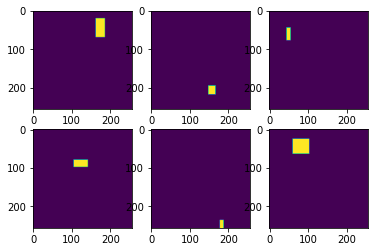

In [83]:
height = width = 256

heatmaps = create_random_bboxes(2, 3, height, width)
plot_heatmaps(heatmaps)

## Debug __iterate_predictions()

In [89]:
%run ./metric.py

In [90]:
m = MAPCocoMetric(gt_df, temp_fpath,
                  output_transform=_extract_for_mAP, device='cpu')

In [96]:
m.reset()

In [97]:
batch_size = 3
n_diseases = 1 # len(VINBIG_DISEASES)
height = width = 256

image_names = [f'test{i}' for i in range(batch_size)]
preds = torch.rand(len(image_names), n_diseases)
heatmaps = create_random_bboxes(len(image_names), n_diseases, height, width)

output = (image_names, preds, heatmaps)

In [98]:
image_preds_pairs = list(m._iterate_predictions(output))
len(image_preds_pairs)

3

In [99]:
preds

tensor([[0.2284],
        [0.2670],
        [0.0602]])

In [100]:
image_preds_pairs

[('test0', [(14, 1, 0, 0, 1, 1)]),
 ('test1', [(14, 1, 0, 0, 1, 1)]),
 ('test2', [(14, 1, 0, 0, 1, 1)])]

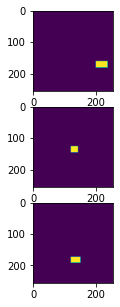

In [101]:
plot_heatmaps(heatmaps)

## Debug update()

In [84]:
%run ./metric.py

In [85]:
%%time

m = MAPCocoMetric(gt_df, temp_fpath,
                  output_transform=_extract_for_mAP, device='cpu')

CPU times: user 641 ms, sys: 8.02 ms, total: 649 ms
Wall time: 647 ms


In [111]:
m.cls_thresh = 0.5
m.reset()

In [108]:
len(gt_df['image_id'].unique())

13495

In [109]:
batch_size = 13000
n_diseases = len(VINBIG_DISEASES)
height = width = 256

image_names = list(gt_df['image_id'].unique())[:batch_size]
preds = torch.rand(len(image_names), n_diseases)
heatmaps = create_random_bboxes(len(image_names), n_diseases, height, width)

output = (image_names, preds, heatmaps)

In [112]:
m.update(output)

KeyboardInterrupt: 

In [106]:
%%time

m.compute()

CPU times: user 23.5 ms, sys: 7.88 ms, total: 31.4 ms
Wall time: 29.4 ms


0.0

In [107]:
preds

tensor([[0.7348, 0.6817, 0.7412, 0.6819, 0.0103, 0.9654, 0.2089, 0.4320, 0.5356,
         0.5936, 0.3789, 0.9171, 0.6175, 0.7613, 0.1719],
        [0.0543, 0.2482, 0.9591, 0.2053, 0.6824, 0.5564, 0.7035, 0.9837, 0.8316,
         0.9710, 0.0395, 0.2708, 0.6248, 0.1232, 0.3400]])